<a href="https://colab.research.google.com/github/Tejasvi-sinha/FeatureSection/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Customer Segmentation using K-Means Clustering</h1>

In [3]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [5]:
# Load the data
data = pd.read_excel("/content/ecom customer_data.xlsx")

In [6]:
# EDA
df = data.copy()
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

<h2>Data Cleaning<h2>

In [7]:
# Check for duplicates
print(df[df.duplicated()])

Empty DataFrame
Columns: [Cust_ID, Gender, Orders, Jordan, Gatorade, Samsung, Asus, Udis, Mondelez International, Wrangler, Vans, Fila, Brooks, H&M, Dairy Queen, Fendi, Hewlett Packard, Pladis, Asics, Siemens, J.M. Smucker, Pop Chips, Juniper, Huawei, Compaq, IBM, Burberry, Mi, LG, Dior, Scabal, Tommy Hilfiger, Hollister, Forever 21, Colavita, Microsoft, Jiffy mix, Kraft]
Index: []

[0 rows x 38 columns]


In [8]:
# Check for missing values
print(df.isna().sum())

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [9]:
# Fill missing values in 'Gender' column with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [10]:
# Confirm no missing values remain
print(df.isna().sum().sum())

0


<h2>Data Visualization<h2>

Gender
F    24778
M     5222
Name: count, dtype: int64


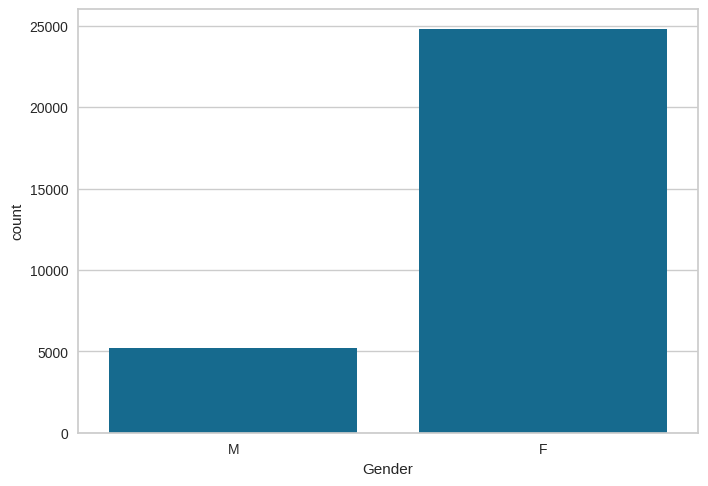

In [11]:
# Gender distribution
print(df.Gender.value_counts())
sns.countplot(data=df, x='Gender')
plt.show()

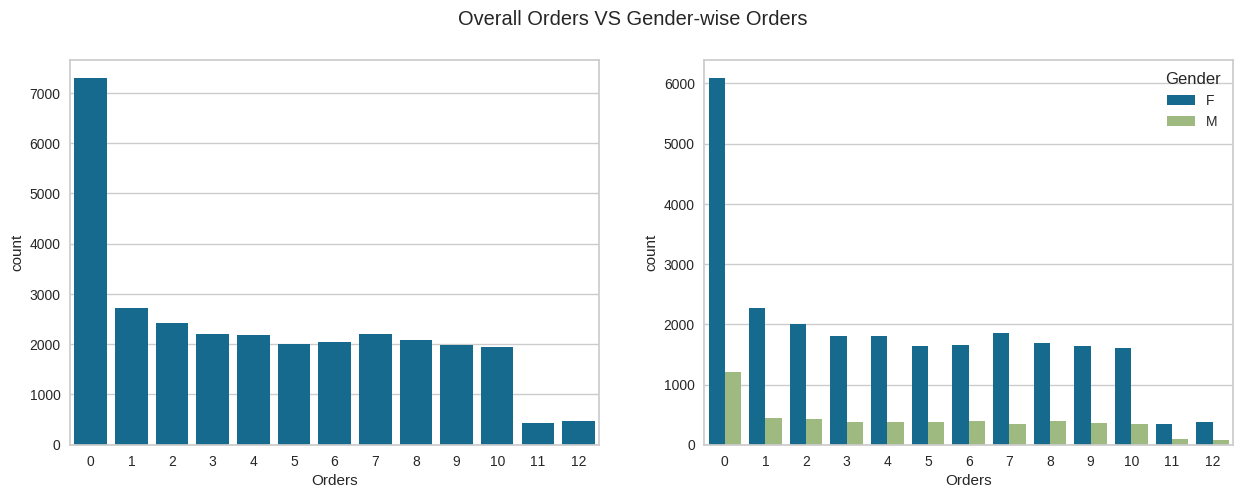

In [12]:
# Overall orders vs. gender-wise orders
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Orders')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Orders', hue='Gender')
plt.suptitle("Overall Orders VS Gender-wise Orders")
plt.show()

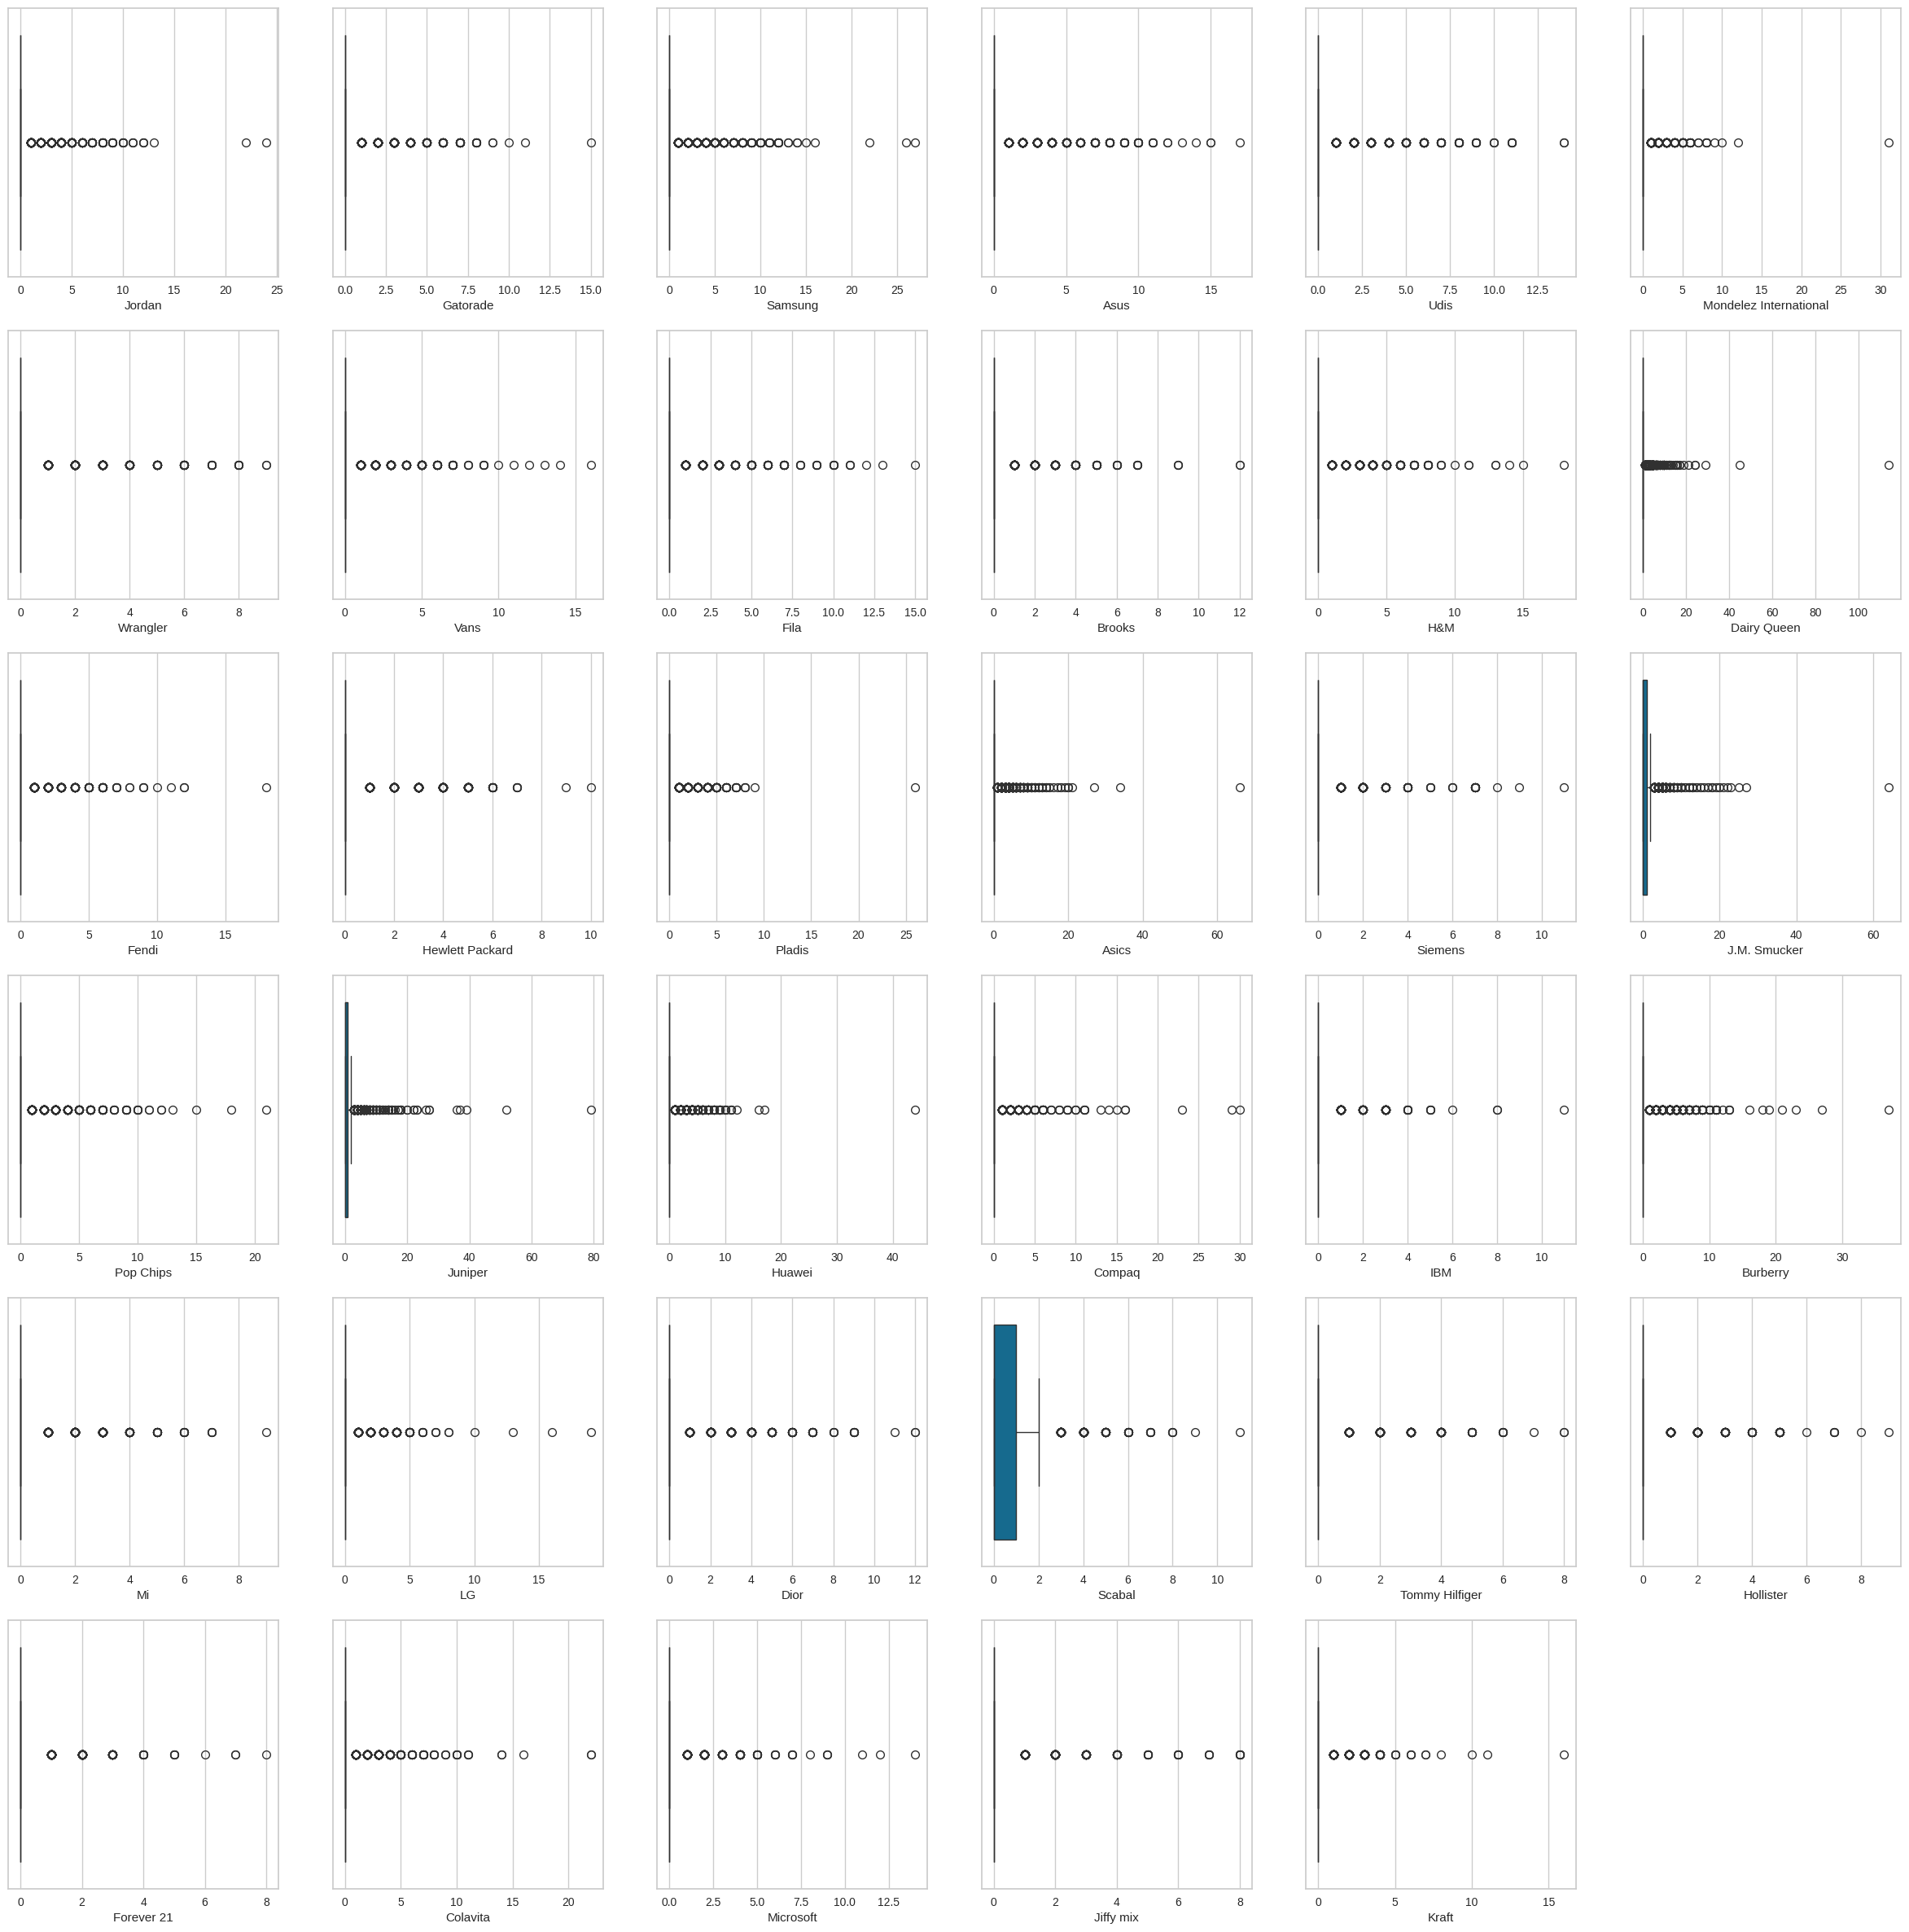

In [13]:
# Orders and searches of each brand
cols = list(df.columns[3:])  # Skip Cust_ID, Gender, and Orders
def dist_list(lst):
    plt.figure(figsize=(30,30))
    for i, col in enumerate(lst, 1):
        plt.subplot(6,6,i)
        sns.boxplot(data=df, x=col)
    plt.show()
dist_list(cols)

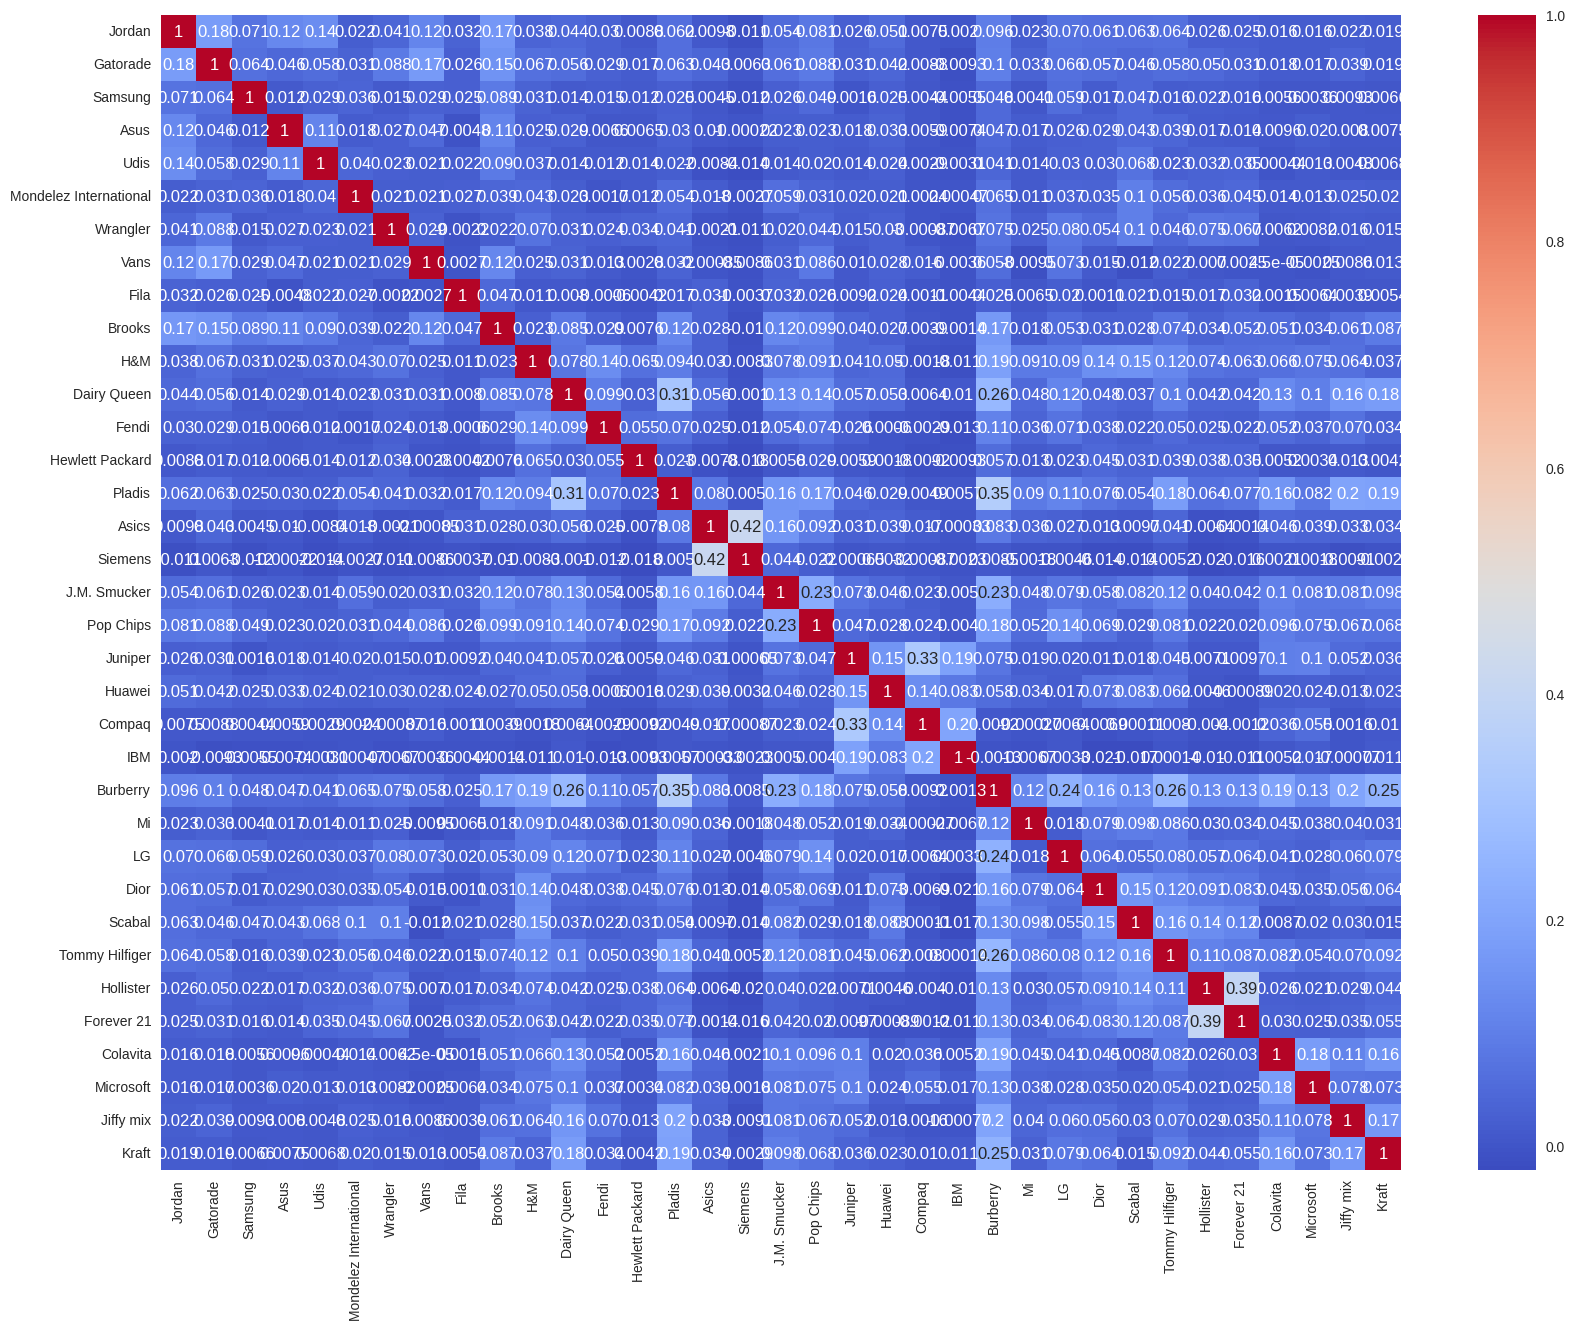

In [14]:
# Heatmap of correlations
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,3:].corr(), annot=True, cmap='coolwarm')
plt.show()

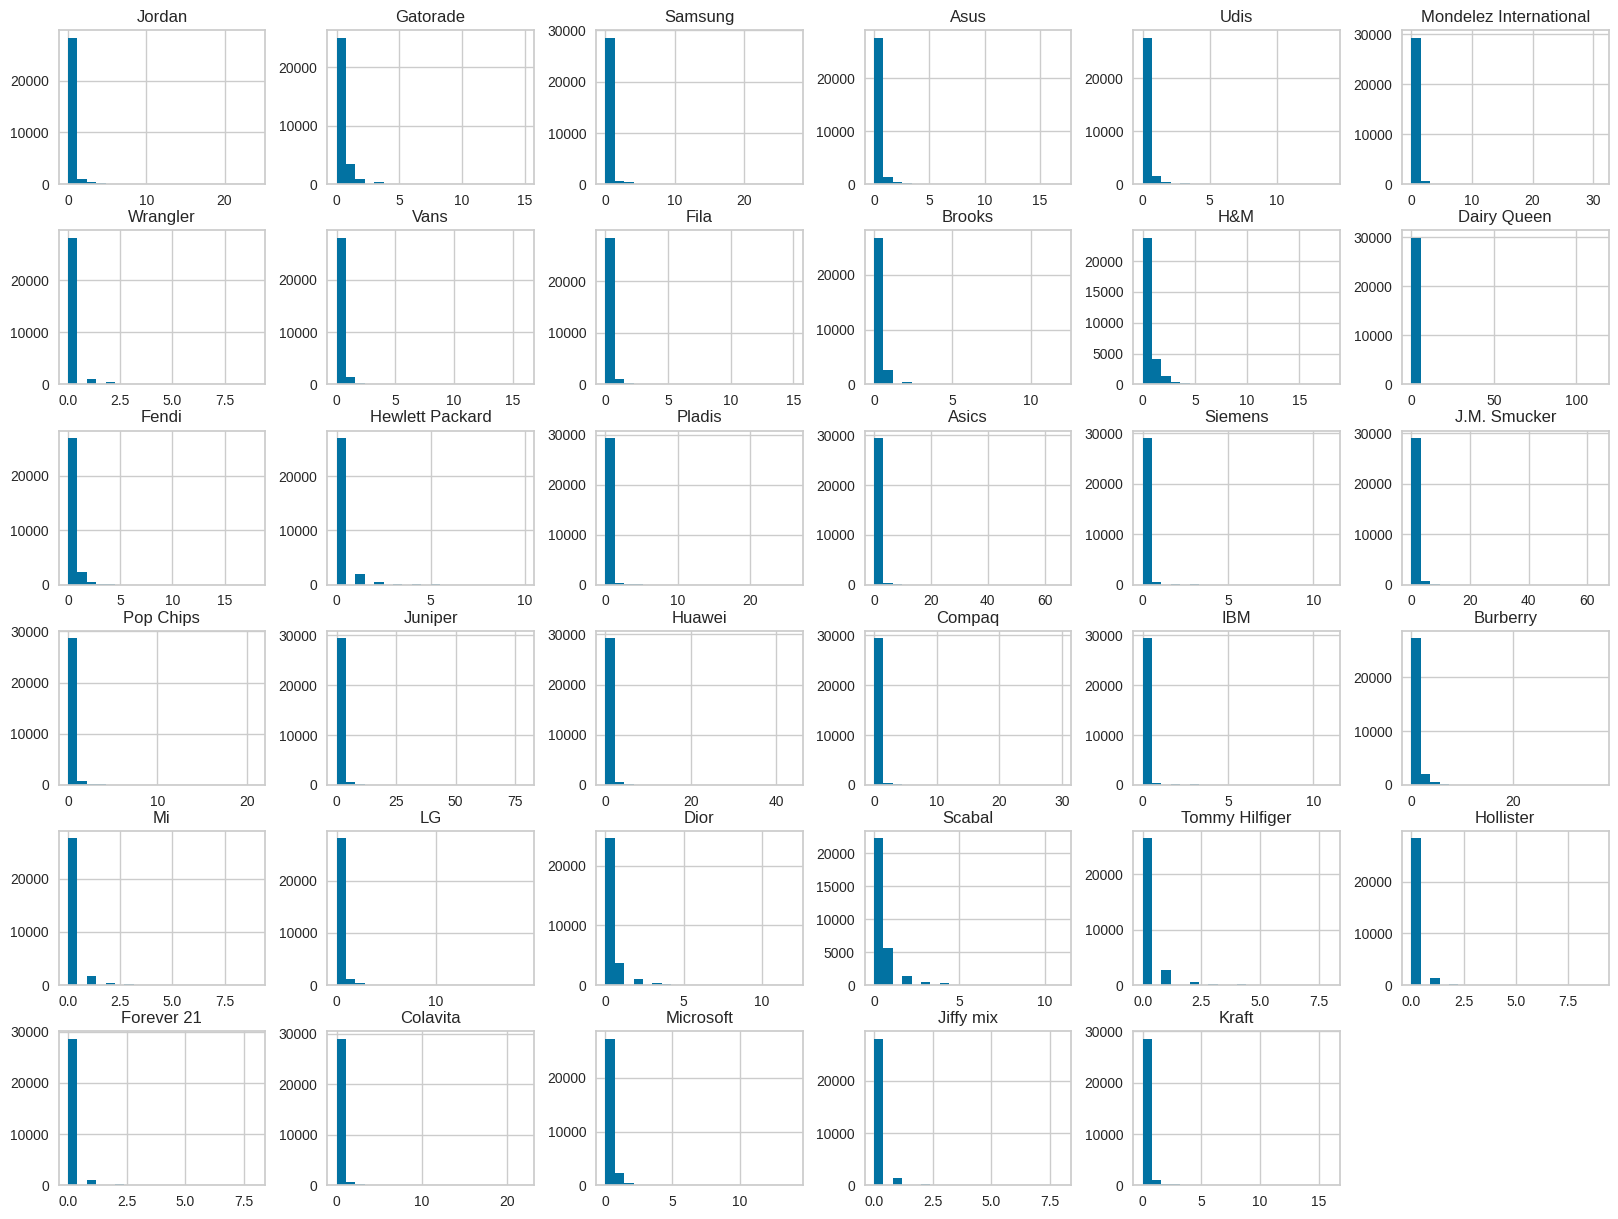

In [15]:
# Histograms
df.iloc[:,3:].hist(figsize=(20,15), bins=20)
plt.show()

In [16]:
# Creating a new feature 'Total Search'
new_df = df.copy()
new_df['Total Search'] = new_df.iloc[:,3:].sum(axis=1)

# Sort values by 'Total Search'
print(new_df.sort_values('Total Search', ascending=False).head())

       Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
9911      9912      F       2       0        11        0     0     0   
24365    24366      F       2       3         3        2     2     0   
4129      4130      F       1       0         0        0     0     0   
888        889      F       0       2         1        3     2     0   
15015    15016      F      10       2         2        2     0     0   

       Mondelez International  Wrangler  ...  Dior  Scabal  Tommy Hilfiger  \
9911                        0         6  ...     2       8               4   
24365                       1         2  ...     2       2               6   
4129                        0         0  ...     0       0               0   
888                         1         3  ...     3       1               5   
15015                       0         0  ...     0       1               0   

       Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  \
9911           9           

<h2>Purchasing Behaviour<h2>

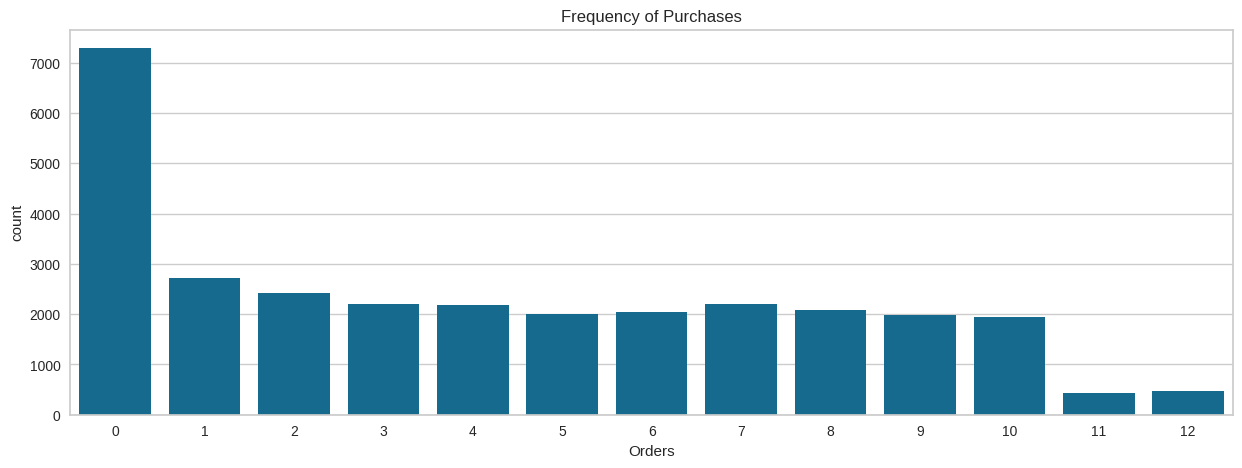

In [17]:
# Frequency of Purchases
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Orders')
plt.title("Frequency of Purchases")
plt.show()

<h2>K-Means Clustering</h2>

In [18]:
# Normalizing the data before clustering
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(new_df.iloc[:, 3:])  # excluding Cust_ID, Gender, Orders

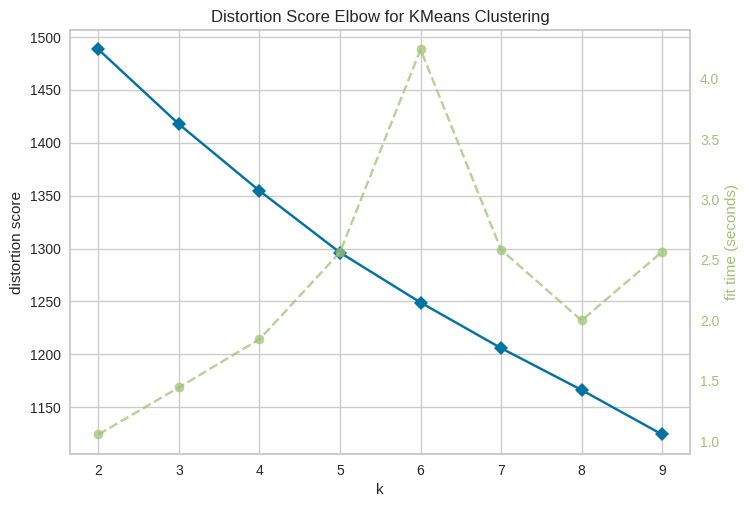

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Determine optimal number of clusters using Elbow method
kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2, 10),locate_elbow=False)
visualizer.fit(scaled_features)
visualizer.show()

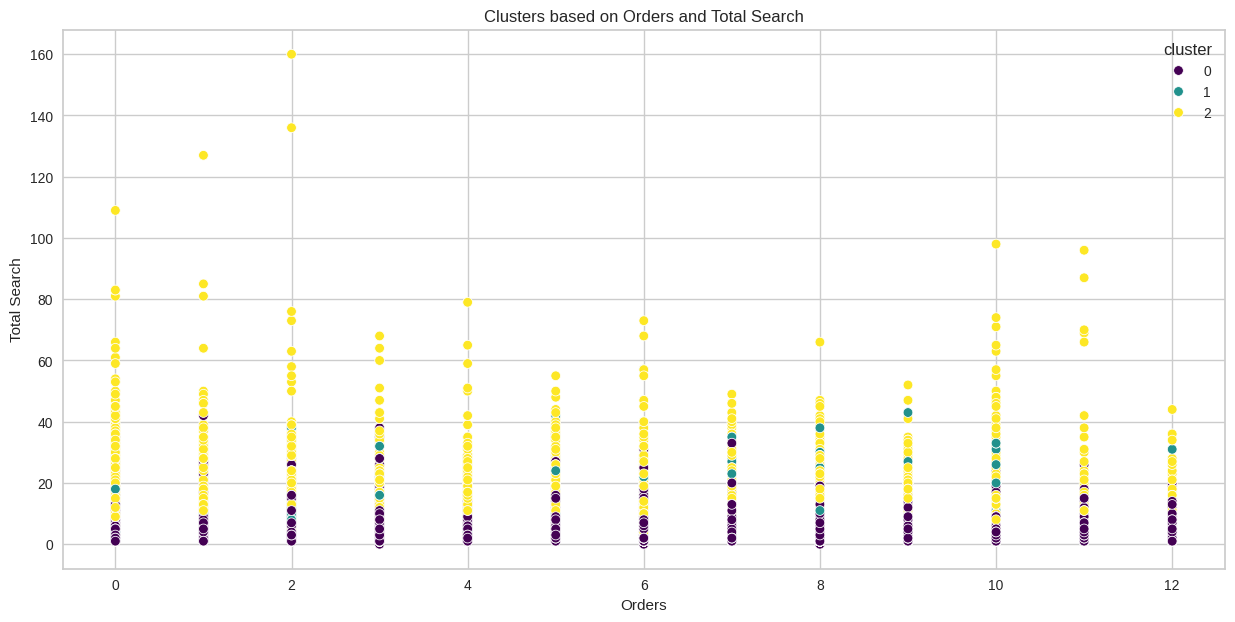

In [20]:
# Check if optimal number of clusters was found
optimal_k = visualizer.elbow_value_
if optimal_k is None:
    optimal_k = 3  # Fallback to a default value if elbow method fails

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
new_df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(15, 7))
sns.scatterplot(data=new_df, x='Orders', y='Total Search', hue='cluster', palette='viridis')
plt.title("Clusters based on Orders and Total Search")
plt.show()

Silhouette Score for 3 clusters: 0.3664723444229819


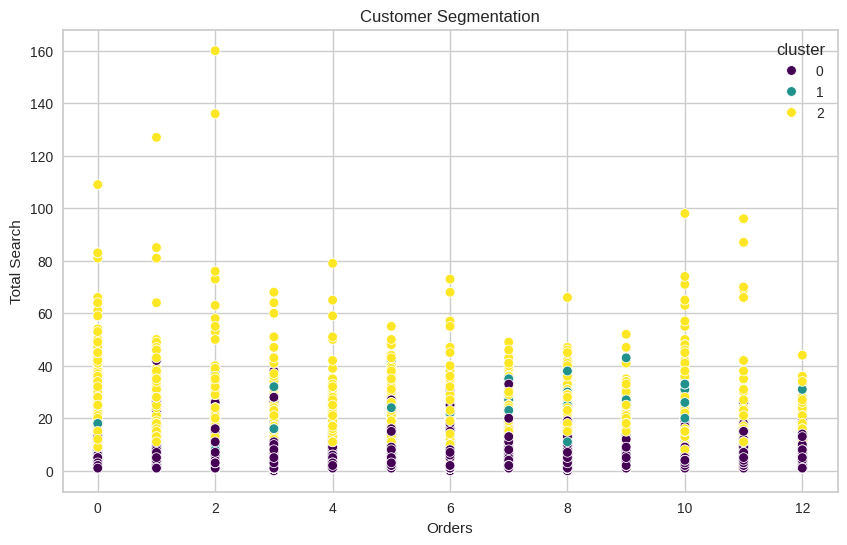

In [21]:
from sklearn.metrics import silhouette_score

# Fit the KMeans model with the chosen number of clusters
optimal_k = 3  # Example: change this based on your visual inspection
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the DataFrame
new_df['cluster'] = cluster_labels

# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x='Orders', y='Total Search', hue='cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.show()
